In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv("C:/Users/pranay/Downloads/EastWestAirlines.csv")

In [4]:
data.head(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
data.tail(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_df = scaler.fit_transform(data)
scaler_df

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

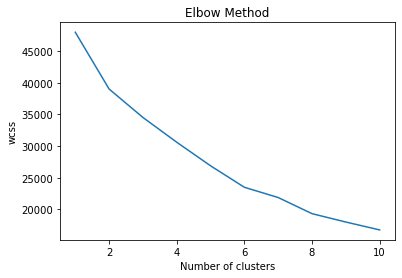

In [8]:
#to find optimum number of cluster
#create a blank list
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaler_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [9]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=6)
predict = kmeans.fit_predict(scaler_df)

In [10]:
predict

array([4, 4, 4, ..., 0, 0, 0])

In [11]:
#building cluster algorithm
clusters_new = KMeans(6,random_state=42)
clusters_new.fit(scaler_df)

KMeans(n_clusters=6, random_state=42)

In [12]:
clusters_new.labels_

array([3, 3, 3, ..., 4, 0, 0])

In [13]:
data['Cluster_Id'] = clusters_new.labels_

In [15]:
clusters_new.cluster_centers_

array([[ 9.76169813e-01, -3.89948720e-01, -3.84584142e-02,
        -7.18862168e-01,  2.67926240e-02, -6.27665798e-02,
        -5.74800090e-01, -6.28003452e-01, -1.95913300e-01,
        -2.19120335e-01, -9.71012962e-01, -4.51141516e-01],
       [-3.01522483e-01,  6.39719256e-01, -8.44329231e-02,
         1.02208440e+00, -9.82418871e-02,  1.56462993e+01,
         3.17969131e+00,  1.71461374e+00,  3.32926913e-02,
         5.96953922e-02,  2.39872612e-01,  3.37527346e-01],
       [-9.19213925e-01,  8.73539411e-01,  4.59338555e-02,
         1.52075683e+00, -8.70827294e-02, -6.27665798e-02,
         1.44273438e+00,  8.67701814e-01, -1.36474068e-02,
        -6.85058365e-03,  9.20663741e-01,  7.00066050e-01],
       [-8.21660921e-01, -1.64118348e-01, -3.59241362e-02,
        -5.26687037e-01,  3.18114006e-02, -5.86685627e-02,
        -4.71922161e-01, -3.92424630e-01, -1.52333836e-01,
        -1.63681205e-01,  8.00042790e-01, -2.05308180e-01],
       [ 5.48909201e-01, -5.85960944e-03, -7.8495929

In [16]:
data.head(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_Id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2


In [17]:
data.tail(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_Id
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0,0


In [18]:
data[data['Cluster_Id']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_Id
1129,1141,1625,0,1,1,1,1375,4,0,0,1547,0,0
1891,1908,8647,0,1,1,1,0,0,0,0,4036,0,0
1898,1915,5112,0,1,1,1,0,0,0,0,4020,0,0
1908,1925,9052,0,1,1,1,280,2,0,0,3987,0,0
1925,1942,12184,0,1,1,1,1160,3,0,0,3939,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,0
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [19]:
data[data['Cluster_Id']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_Id
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,1
384,389,28193,0,5,1,4,103456,32,0,0,6980,1,1
850,861,25629,0,4,1,5,107308,36,600,2,5966,1,1
904,915,15835,0,2,1,5,112171,16,0,0,5825,1,1
1036,1047,154664,0,4,1,3,73881,33,0,0,5769,0,1
1244,1257,166465,0,4,1,4,98717,30,0,0,5531,0,1
1300,1313,737514,0,3,1,4,43993,40,2150,7,5030,0,1
1878,1895,128302,0,5,1,4,132263,32,400,2,4103,1,1
1917,1934,82981,0,5,1,3,105325,44,1000,2,3964,1,1
1946,1963,126873,0,4,1,5,95598,32,500,1,3880,1,1


In [20]:
data[data['Cluster_Id']==2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_Id
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,2
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,2
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,2
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2938,2960,310226,0,4,1,1,61894,28,1700,9,2900,1,2
2990,3012,71263,0,5,1,1,80554,41,0,0,2987,1,2
3137,3159,298505,0,5,1,1,130647,32,600,2,2483,1,2
3772,3795,822321,0,5,1,1,138334,26,600,2,3288,1,2


In [21]:
data[data['Cluster_Id']==3]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_Id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
5,6,16420,0,1,1,1,0,0,0,0,6942,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,2231,150972,0,1,1,1,2700,3,700,2,3645,1,3
2263,2281,114549,0,1,1,1,5000,4,1000,2,3760,1,3
2277,2295,119340,1000,1,1,1,400,5,400,5,3855,1,3
2290,2308,49874,0,1,1,1,7200,9,1700,4,3817,1,3


In [22]:
data[data['Cluster_Id']==4]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_Id
1141,1153,22116,0,3,1,1,20809,14,0,0,5463,1,4
1143,1155,36079,0,3,1,1,22506,22,150,1,5323,0,4
1155,1167,46535,0,3,1,1,25891,14,150,1,5399,1,4
1160,1172,60170,0,3,1,1,17235,14,0,0,5351,1,4
1173,1185,4137,0,3,1,1,15891,19,0,0,5588,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,4002,57793,0,3,1,1,20959,15,1198,3,1424,1,4
3980,4003,28867,0,3,1,1,19169,28,0,0,1425,0,4
3985,4008,59017,0,4,1,1,34746,25,0,0,1418,0,4
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,4


In [23]:
data[data['Cluster_Id']==5]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_Id
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,5
42,43,60313,0,1,1,1,10000,26,3250,9,7829,1,5
65,66,53914,0,3,1,1,33767,45,5550,29,6826,1,5
94,97,185549,0,5,1,1,110859,39,2950,16,6778,1,5
112,115,124198,0,5,1,1,66330,23,4833,10,7710,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,3930,126490,0,1,1,1,8808,15,5183,12,1566,0,5
3911,3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,5
3917,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,5
3934,3957,76595,0,1,1,1,10577,2,9577,1,1515,0,5
